In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators.csv')

In [4]:
df.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     311745
DataValueUnit                     0
DataValueType                     0
DataValue                    101061
DataValueAlt                 101061
DataValueFootnoteSymbol      208987
DataValueFootnote            208987
LowConfidenceLimit           121372
HighConfidenceLimit          121367
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      311745
Stratification2              311745
StratificationCategory3      311745
Stratification3              311745
Geolocation                    5809
LocationID                        0
TopicID                           0
QuestionID                        0
ResponseID                   311745
DataValueTypeID             

In [6]:
# Fill missing values with appropriate methods
df['DataValue'].fillna(df['DataValue'].median(), inplace=True)
df['LowConfidenceLimit'].fillna(df['LowConfidenceLimit'].median(), inplace=True)
df['HighConfidenceLimit'].fillna(df['HighConfidenceLimit'].median(), inplace=True)

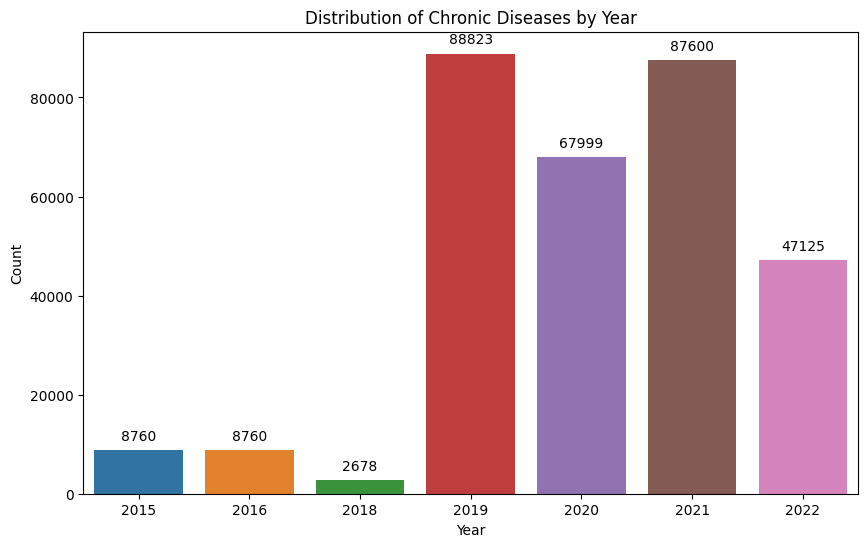

In [7]:
# Explore distribution of chronic diseases by year
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='YearStart')
plt.title('Distribution of Chronic Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [8]:
df.describe()

,YearStart,YearEnd,Response,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID,ResponseID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,311745.000000,311745.000000,0.0,3.117450e+05,2.106840e+05,311745.000000,311745.000000,0.0,0.0,0.0,0.0,311745.000000,0.0,0.0,0.0,0.0,0.0
mean,2020.028328,2020.302430,NaN,4.749294e+02,7.308139e+02,30.143978,39.554666,NaN,NaN,NaN,NaN,31.213934,NaN,NaN,NaN,NaN,NaN
std,1.535006,1.075266,NaN,1.327713e+04,1.828234e+04,51.341617,55.130167,NaN,NaN,NaN,NaN,17.803762,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,2019.000000,NaN,1.846000e+01,1.240000e+01,15.200000,22.800000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,2020.000000,NaN,2.700000e+01,2.700000e+01,19.600000,29.300000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,2021.000000,NaN,3.830000e+01,5.830000e+01,25.400000,36.300000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN
max,2022.000000,2022.000000,NaN,2.925456e+06,2.925456e+06,1427.000000,1485.900000,NaN,NaN,NaN,NaN,78.000000,NaN,NaN,NaN,NaN,NaN


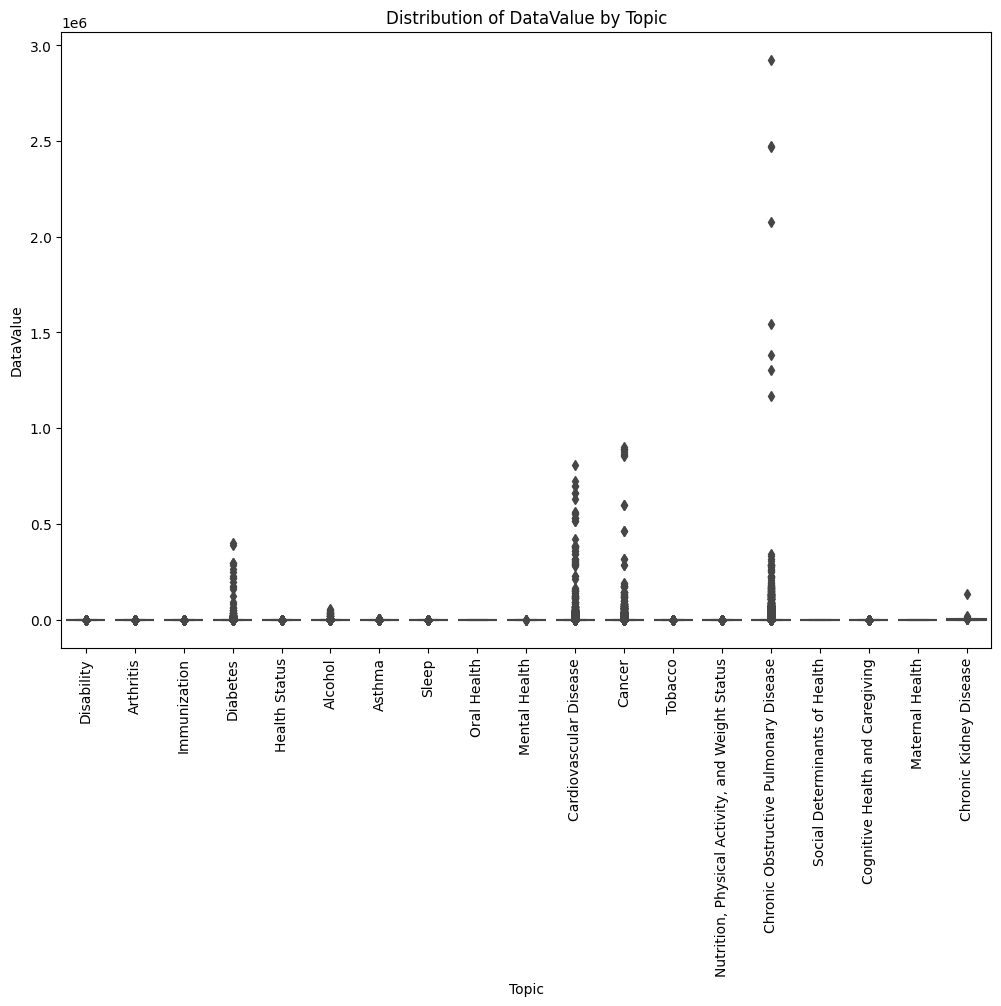

In [9]:
# Boxplot of DataValue by Topic
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Topic', y='DataValue')
plt.title('Distribution of DataValue by Topic')
plt.xlabel('Topic')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

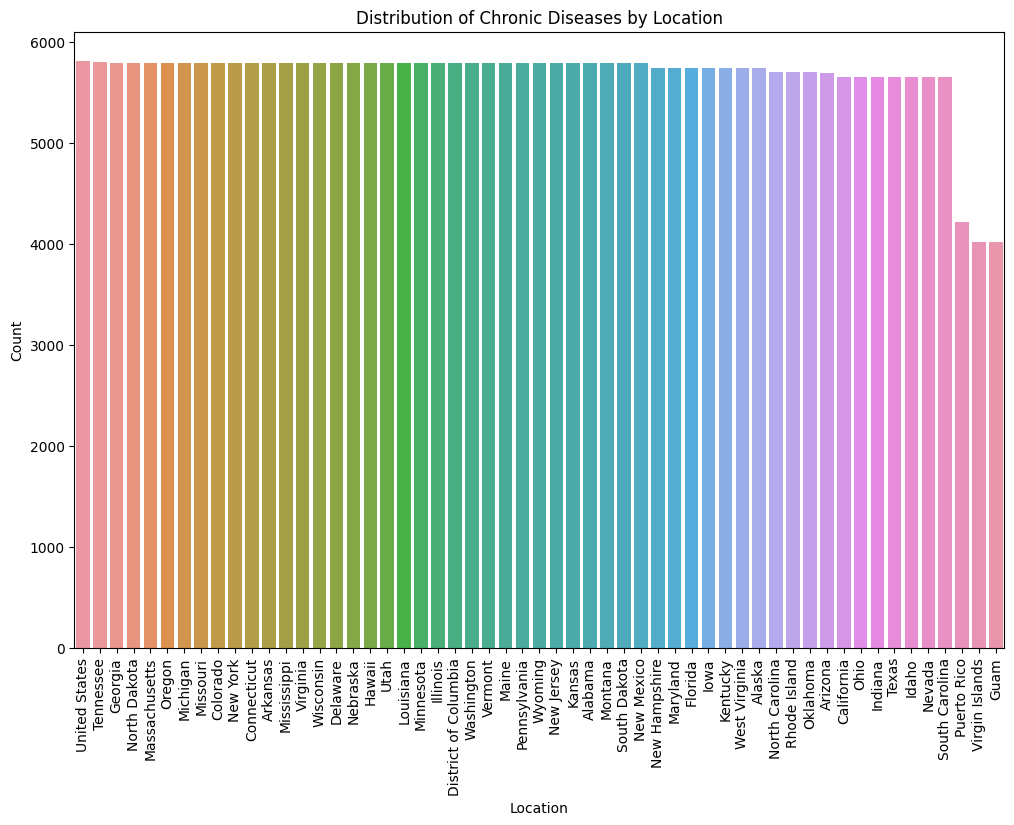

In [10]:
# Distribution of Chronic Diseases by Location
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='LocationDesc', order=df['LocationDesc'].value_counts().index)
plt.title('Distribution of Chronic Diseases by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

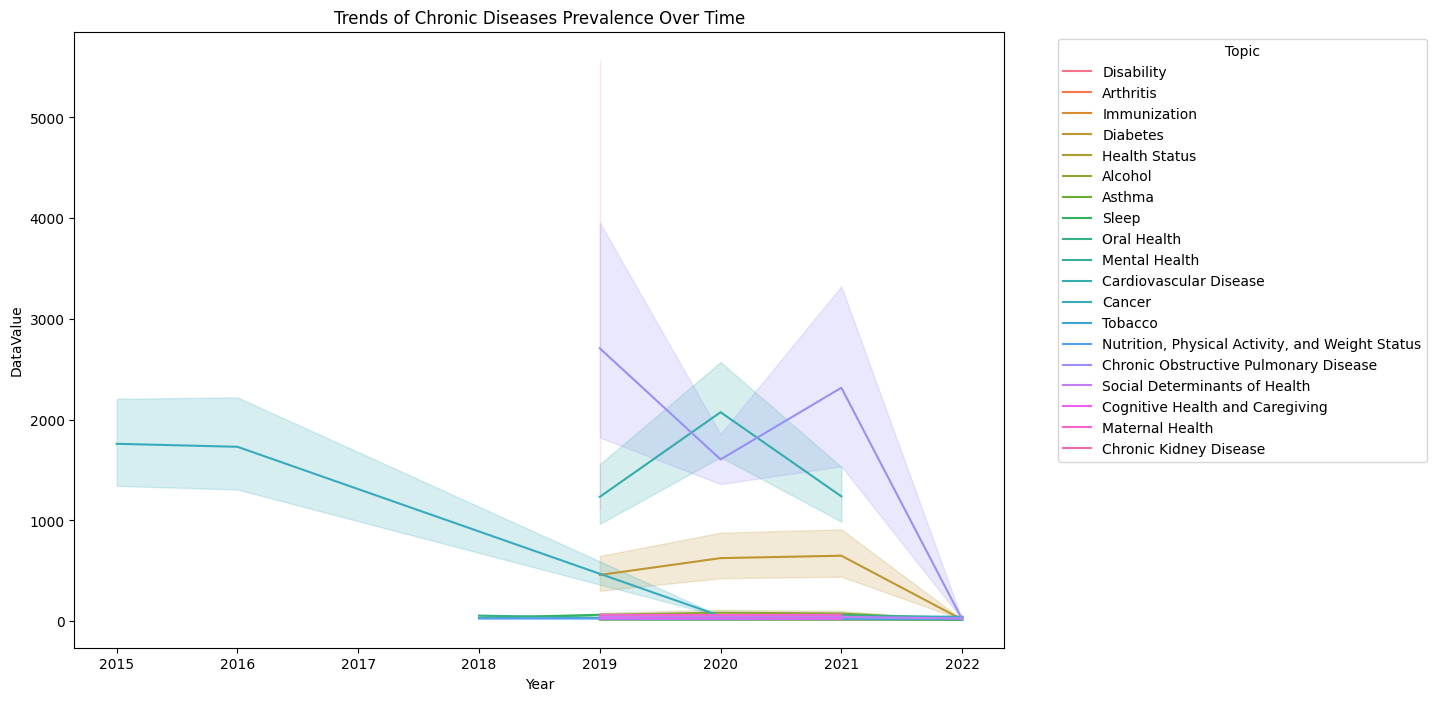

In [11]:
# Trends Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='YearStart', y='DataValue', hue='Topic')
plt.title('Trends of Chronic Diseases Prevalence Over Time')
plt.xlabel('Year')
plt.ylabel('DataValue')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

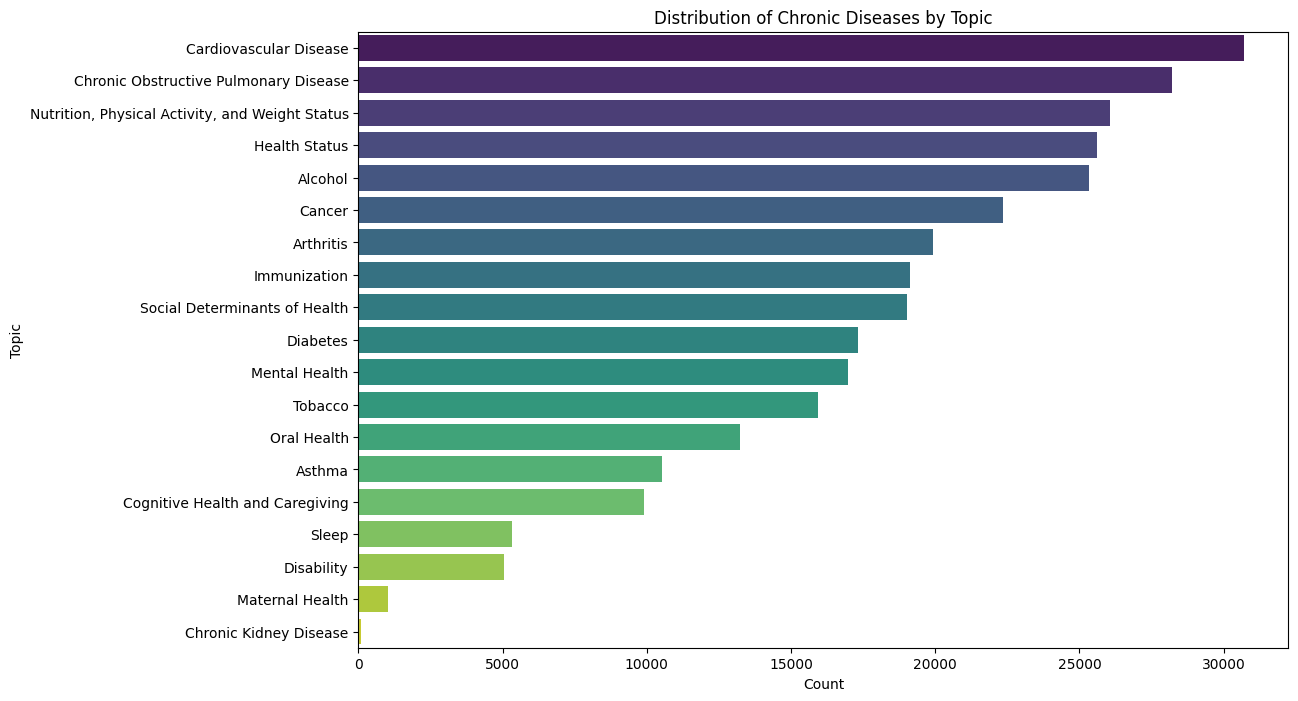

In [12]:
# Distribution of Chronic Diseases by Topic
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Topic', palette='viridis', order=df['Topic'].value_counts().index)
plt.title('Distribution of Chronic Diseases by Topic')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

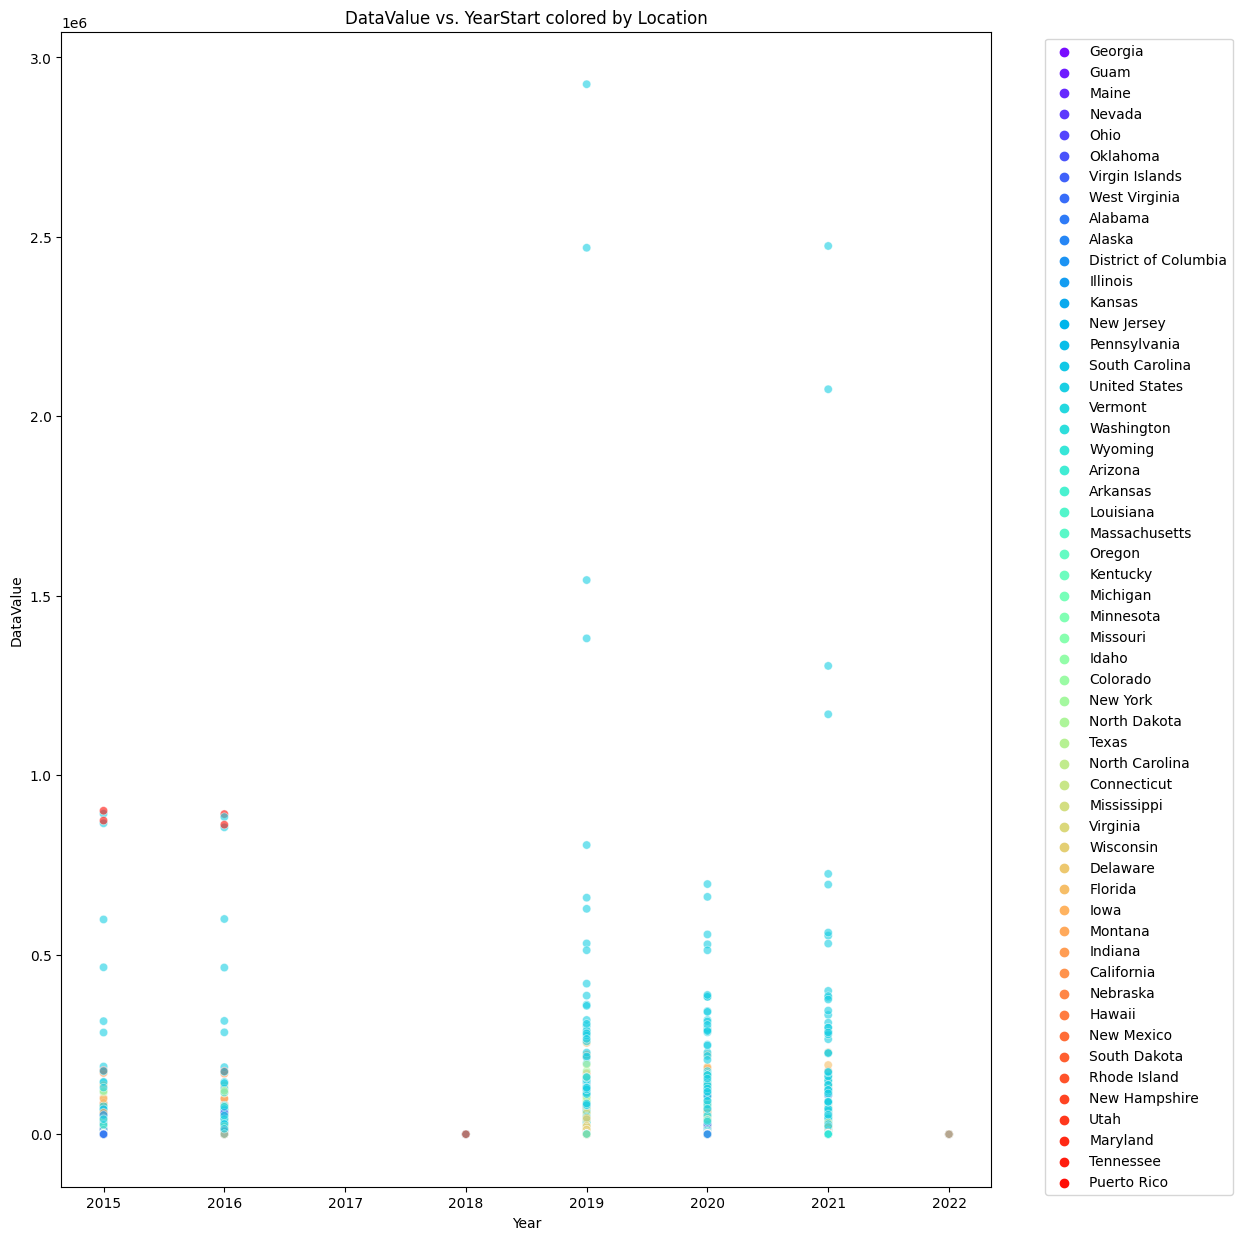

In [13]:
# Scatter Plot of DataValue vs. YearStart colored by Location
plt.figure(figsize=(12, 15))
sns.scatterplot(data=df, x='YearStart', y='DataValue', hue='LocationDesc', palette='rainbow', alpha=0.6)
plt.title('DataValue vs. YearStart colored by Location')
plt.xlabel('Year')
plt.ylabel('DataValue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

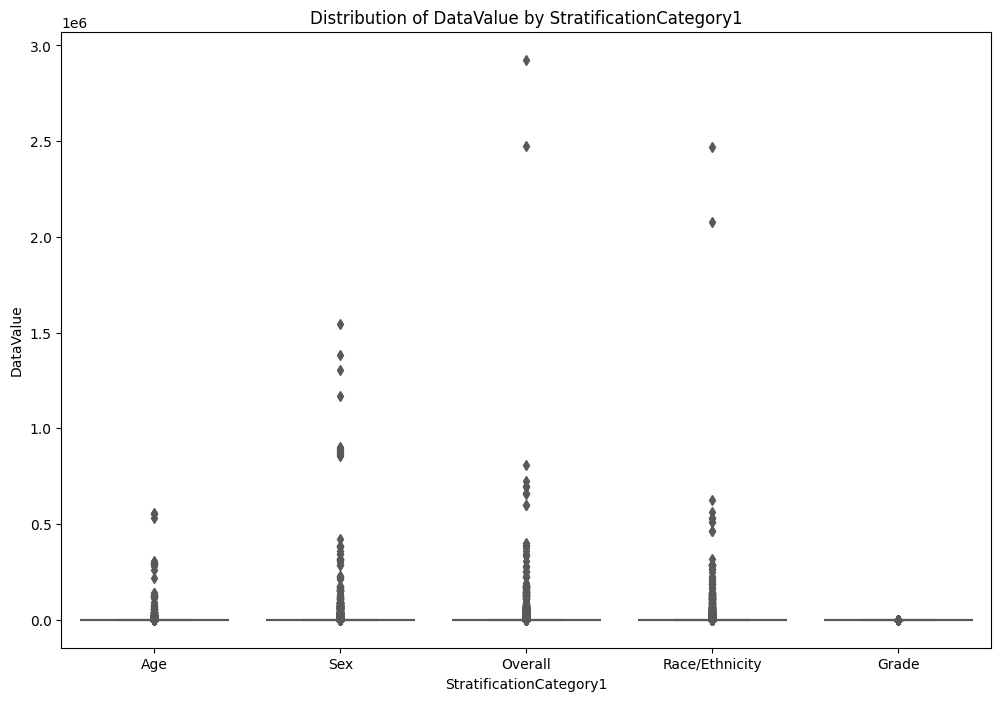

In [14]:
# Boxplot of DataValue by StratificationCategory1
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='StratificationCategory1', y='DataValue', palette='Set2')
plt.title('Distribution of DataValue by StratificationCategory1')
plt.xlabel('StratificationCategory1')
plt.ylabel('DataValue')
plt.show()

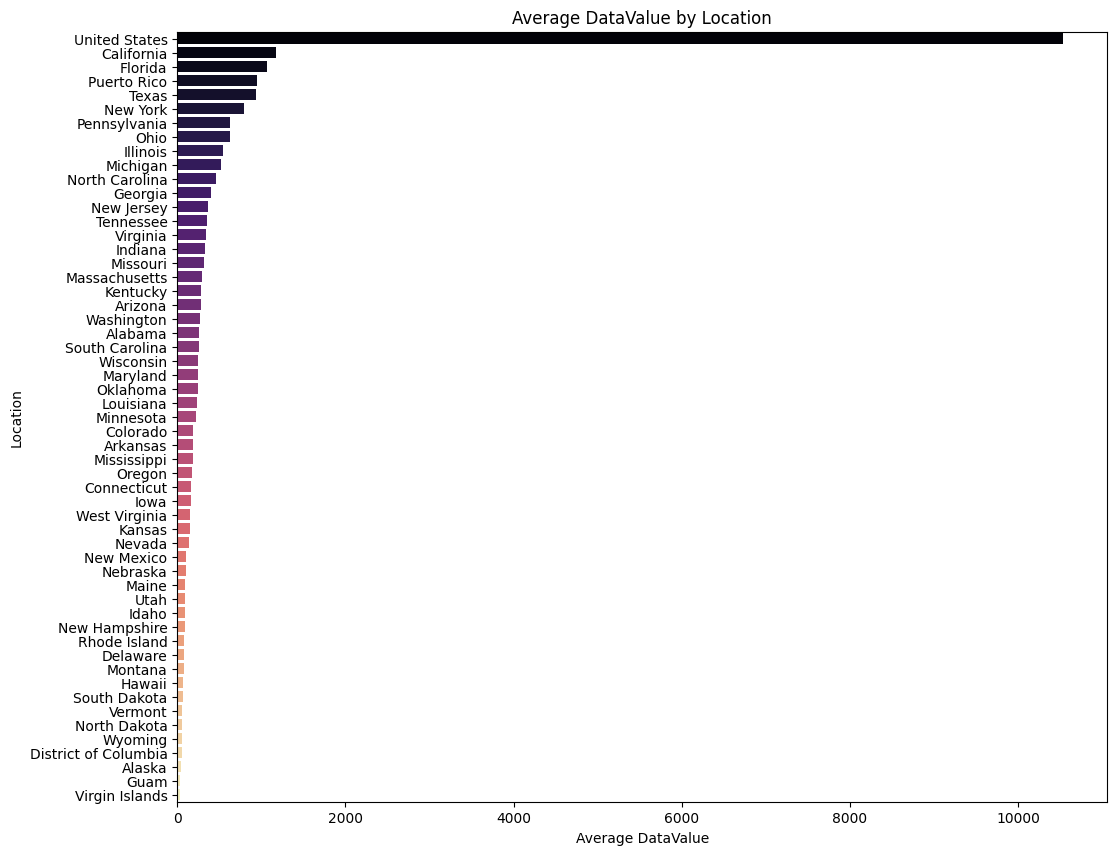

In [16]:
# Bar Plot of Average DataValue by LocationDesc
avg_data_value_by_location = df.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x=avg_data_value_by_location.values, y=avg_data_value_by_location.index, palette='magma')
plt.title('Average DataValue by Location')
plt.xlabel('Average DataValue')
plt.ylabel('Location')
plt.show()